# 6 基于深度卷积神经网络的图像分类（迁移学习）(Image Classify)

图像分类是计算机视觉中经典的任务之一，我们今天迁移学习所使用的模型`ResNet`最初也是用于图像分类

咱们来看一下今天的主角`ResNet` <br/>
![ResNet](https://pic2.zhimg.com/80/v2-7cb9c03871ab1faa7ca23199ac403bd9_720w.jpg)

残差单元？ <br/>
![残差单元](https://pic1.zhimg.com/80/v2-0892e5423616c30f69ded61111b111c0_720w.jpg)

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
model=tf.keras.models.load_model('3_ResNetv3Large_20120826_085751_epoch19.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1, 1, 1280)       4226432   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 prediction_layer (Dense)    (None, 8)                 10248     
                                                                 
Total params: 4,236,680
Trainable params: 3,325,040
Non-trainable params: 911,640
_________________________________________________________________


In [13]:
import os
import numpy as np
from cv2 import cv2 as cv
from matplotlib import pyplot as plt
import random

In [14]:
def load_image_path(root):
    for root, dirs, files in os.walk(root):
        image_path = files
    image_path = [os.path.join(root, i) for i in image_path]
    return image_path

In [15]:
image_path=load_image_path('test_img1')
random.shuffle(image_path) # 随机打乱顺序
print('共有%d张图片'%len(image_path))
print(image_path[:10])

共有66张图片
['test_img1\\16284062304106.png', 'test_img1\\1628347166652895.png', 'test_img1\\162834731944961.png', 'test_img1\\136.png', 'test_img1\\162834749356169.png', 'test_img1\\162834750832572.png', 'test_img1\\162834474794568.png', 'test_img1\\138.png', 'test_img1\\u=16637291,206223&fm=193&f=GIF.jpg', 'test_img1\\16284062341821.png']


In [16]:
# 将所有图片加载到内存
image=[cv.imread(i) for i in image_path]

In [17]:
# 将图片缩放到(224,224)
image=[cv.resize(i, (224,224)) for i in image]

In [18]:
# 将图片转化为tensorflow的图片格式（BGR）
image=np.array(image)
image=image[...,::-1]

In [19]:
# 用模型分析图片
ans=model.predict_on_batch(image)
ans=tf.nn.softmax(ans)
# 处理答案
sub=np.argmax(ans,axis=1)
pos=np.max(ans,axis=1)

In [20]:
# 声明类别
class_names=['animals','buildings','drawings','food','people','plants','scenery','text']

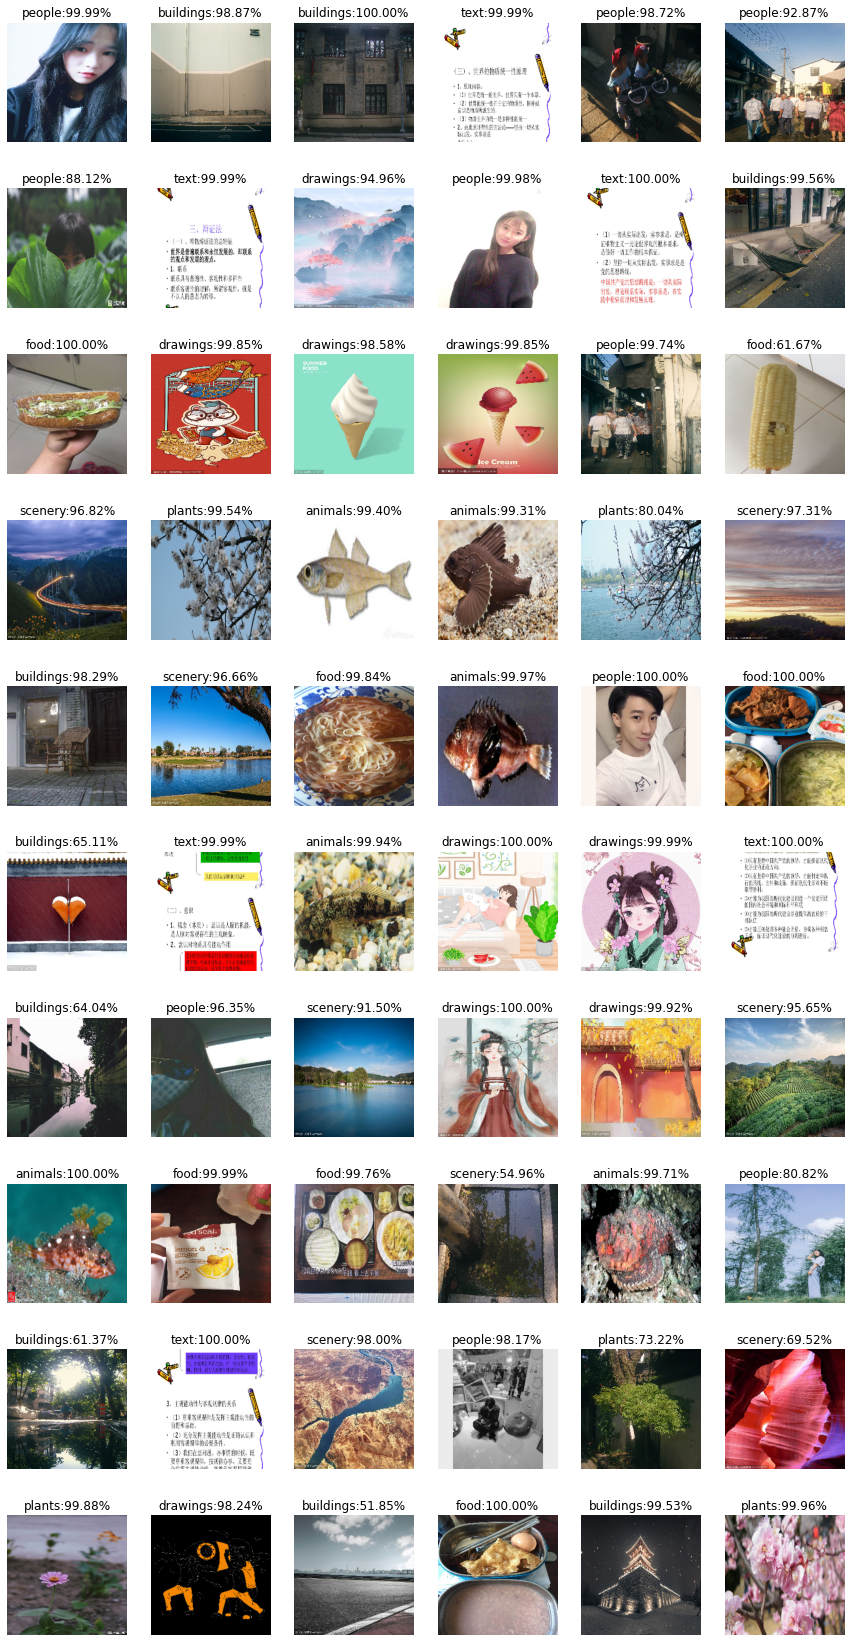

In [21]:
# 绘图输出
plt.figure(figsize=(15, 30))
for i in range(60):
    ax = plt.subplot(10, 6, i + 1)
    plt.imshow(image[i])
    plt.title(str(class_names[sub[i]])+':%.2f%%'%(pos[i]*100))
    plt.axis("off")